In [170]:
import re
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats


In [175]:
#define the file to extract data
eval_files = [
    ('baseline', '../evalbaseline/results.txt'),
    ('baseline_with_history', '../evalbaseline/results_with_history.txt'),
    ('history-summary', '../evalbaseline/run_with_history_summarization_prompt_only.txt'),
    ('ensembling', '../evalbaseline/run_with_rephrasing_prompt_only.txt'),
    ('both-augmentations','../evalbaseline/run_with_history_summary_and_rephrasing_prompt.txt')
]
# metrics = ['ragas_score', 'context_relevancy', 'context_recall', 'answer_similarity', 'answer_relevancy', 'faithfulness', 'semantic_similarity']
metrics = ['answer_relevancy', 'faithfulness', 'semantic_similarity']

results = {}
for eval_name, eval_file in eval_files:
    #Open the file
    with open(eval_file, 'r') as file:
        lines = file.readlines()
    #filter lines to get those that contain Scores
    score_lines = [line for line in lines if 'Score=' in line]
    scores = {key : [] for key in metrics}
    for line in score_lines:
        try:
            score_part = re.search(r"Score=(.*)", line).group(1)
            score_dict = json.loads(score_part.replace("'", "\""))
            for key in scores:
                if key in score_dict:
                    scores[key].append(score_dict[key])
        except Exception:
            print('exception caught when processing line: ', line, 'for eval_name: ', eval_name)
    results[eval_name] = scores


exception caught when processing line:  2025-01-04 18:32:24,064 - INFO - Score={'answer_relevancy': 0.0000, 'semantic_similarity': 0.7171, 'faithfulness': nan}
 for eval_name:  history-summary


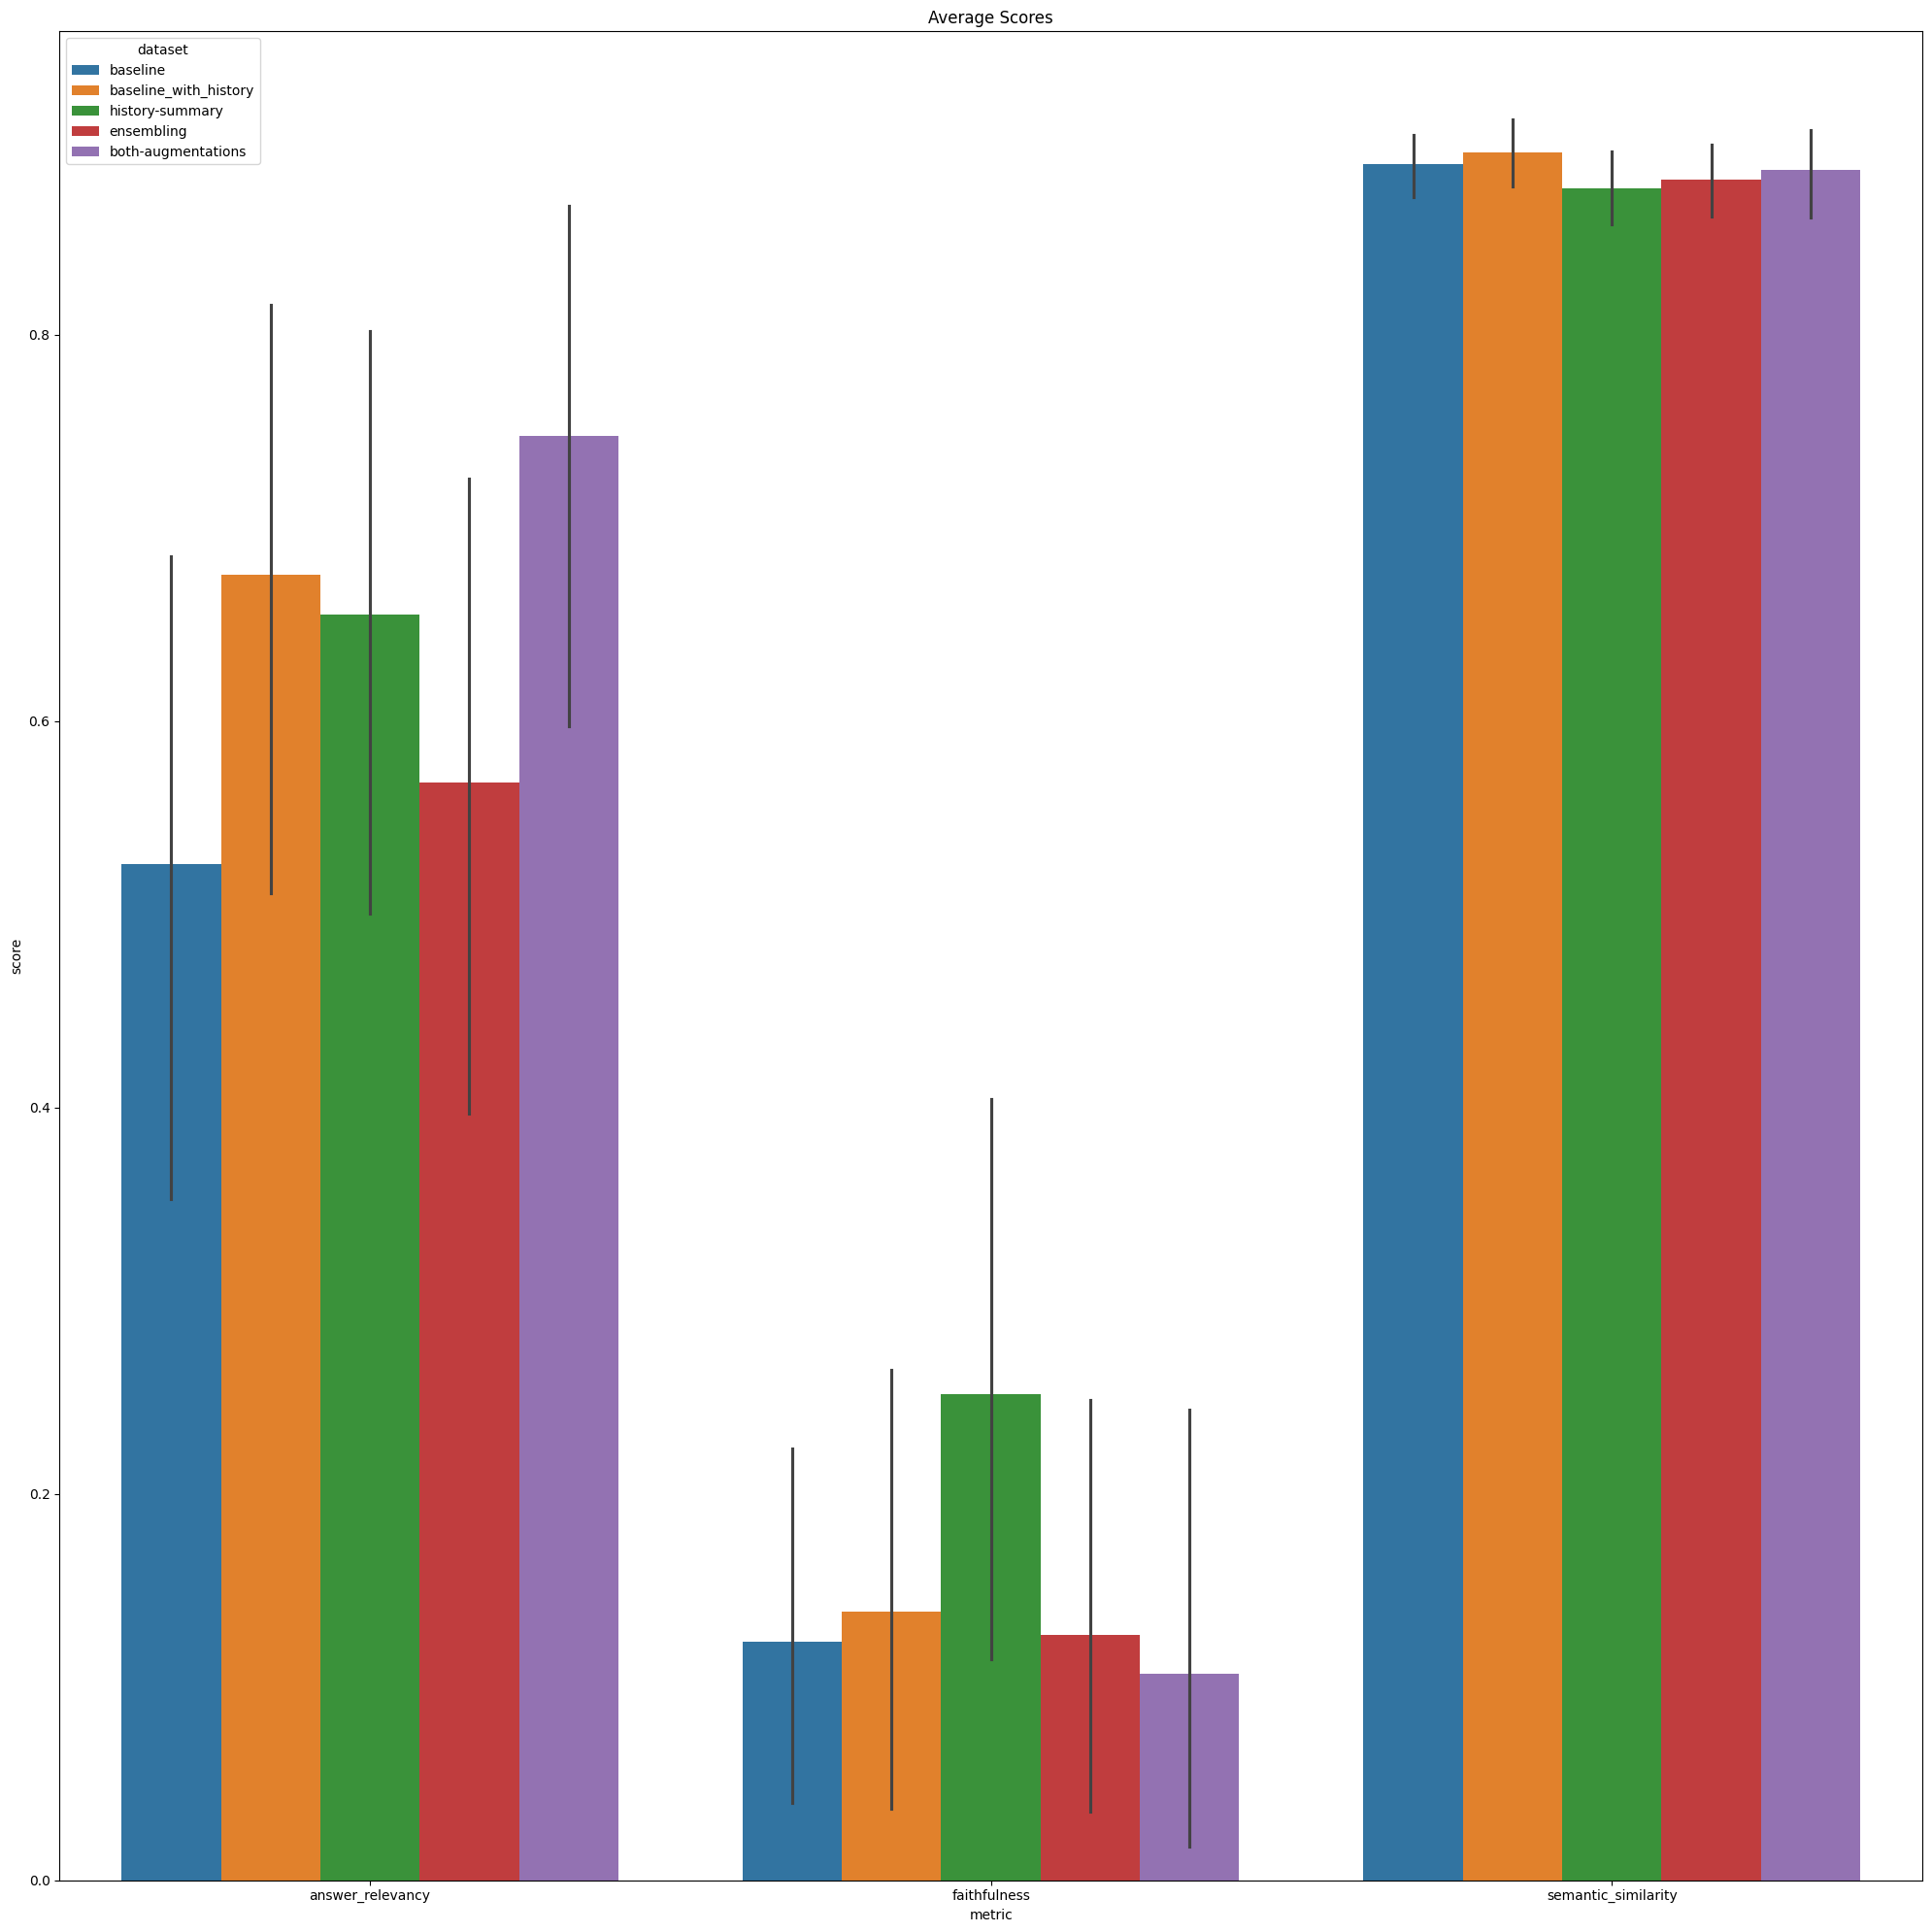

In [176]:
df = pd.DataFrame(results).T

data_frame_prep = []
for metric in df:
    metric_data = df[metric]
    for dataset, data in metric_data.items():
        # mean = float('nan')
        # median = float('nan')
        # trunc_mean = float('nan')
        # if len(data) != 0:
        #     mean = np.mean(data)
        #     median = np.median(data)
        #     trunc_mean = stats.trim_mean(data, proportiontocut=0.1)
        # data_frame_prep.append([score, dataset, mean, median, trunc_mean])
        for score in data:
            data_frame_prep.append([metric, dataset, score])
# df = pd.DataFrame(data_frame_prep, columns=['metric', 'dataset', 'mean', 'median', 'trunc_mean'])
df = pd.DataFrame(data_frame_prep, columns=['metric', 'dataset', 'score'])

# df
# sns.barplot(x='metric', y='trunc_mean', hue='dataset', data=df)
sns.barplot(x='metric', y='score', hue='dataset', data=df).set_title('Average Scores')
plt.tight_layout()
plt.show()


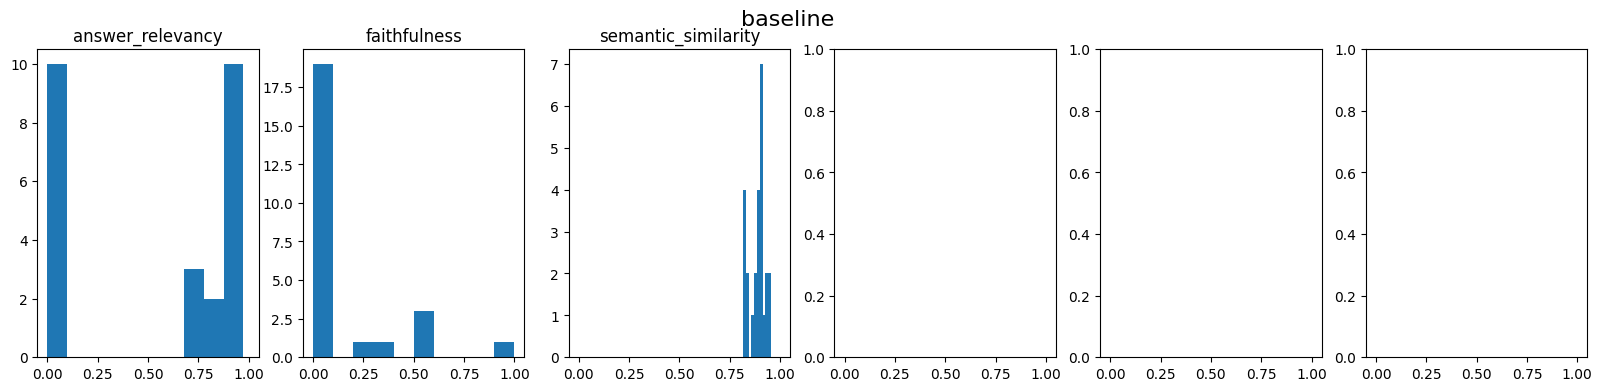

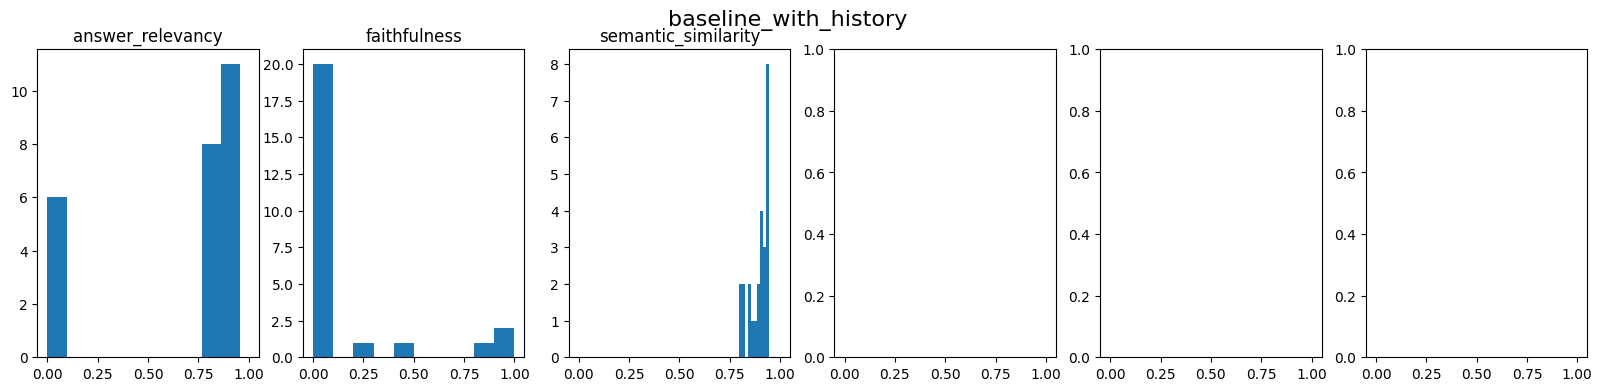

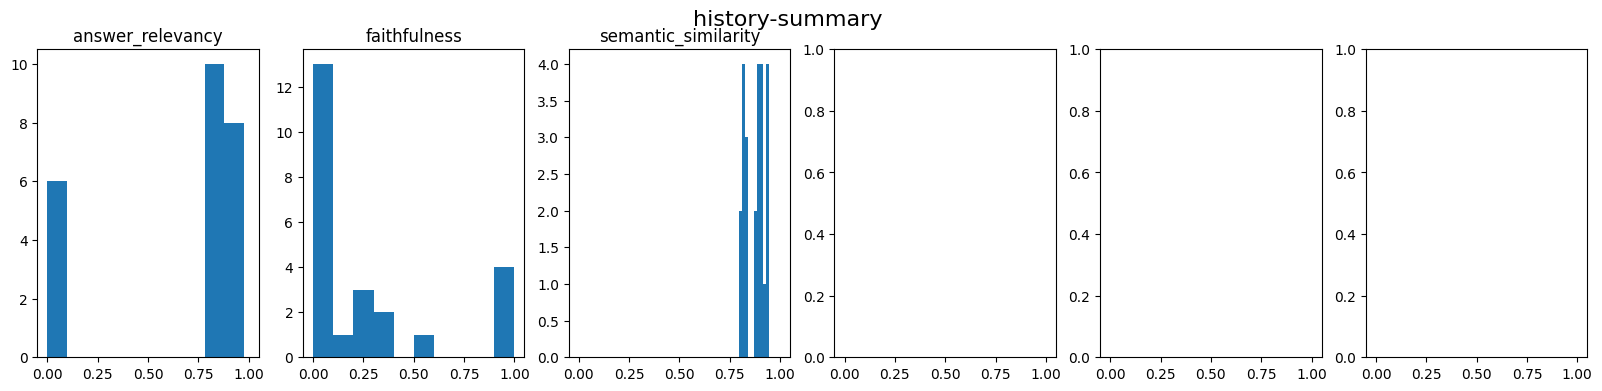

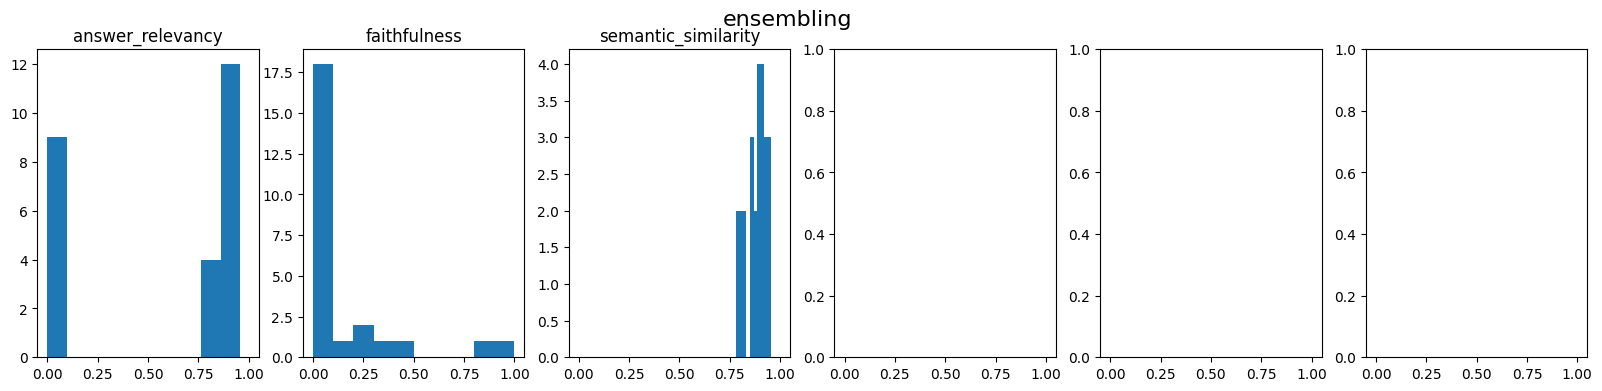

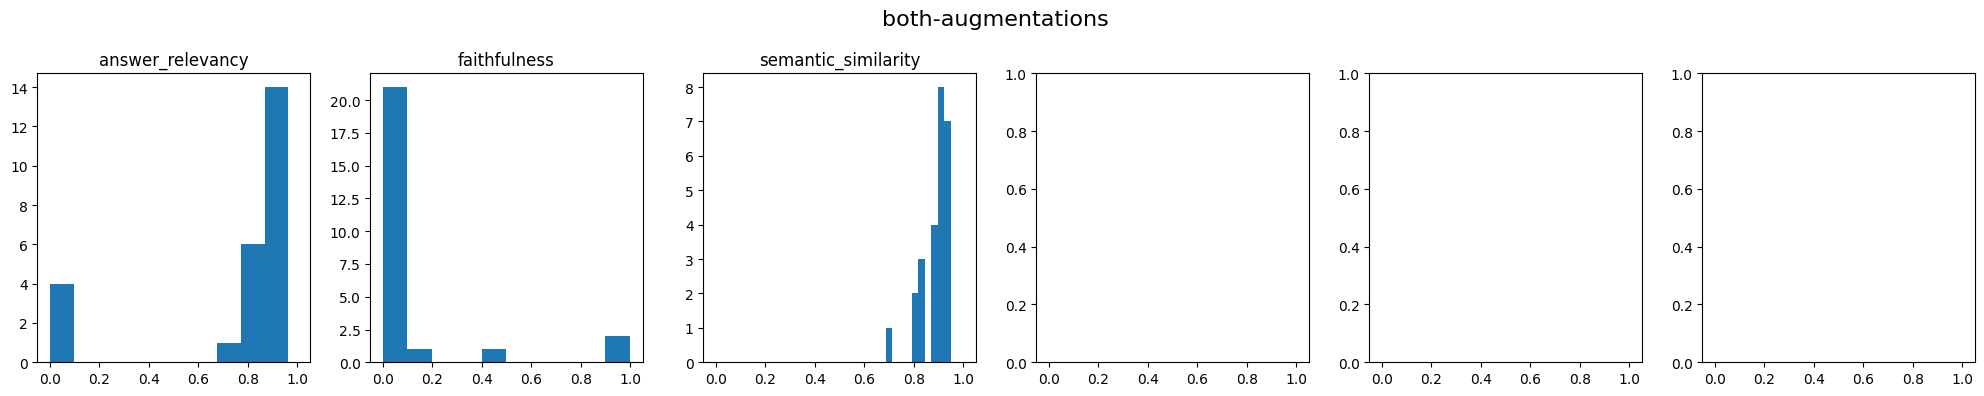

In [162]:
for eval_name, scores in results.items():
    fig, axs = plt.subplots(1, 6, figsize=(20, 4), sharex=True)
    for i, key in enumerate(scores):
        axs[i].hist(scores[key])
        axs[i].set_title(key)
    fig.suptitle(eval_name, fontsize=16)
plt.tight_layout()